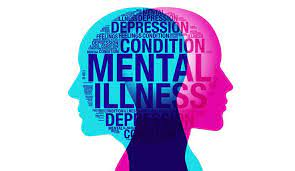

<div style="border: 2px solid #004080; background-color: #f0f8ff; padding: 15px; margin: 20px 0; border-radius: 8px;">
    <h2 style="font-family: Verdana, sans-serif;">What is Mental Health?</h2>
    <p style="font-size: 16px; font-family: Arial, sans-serif;">
        Mental health encompasses our emotional, psychological, and social well-being. It influences how we think, feel, and behave, and plays a role in how we manage stress, relate to others, and make choices. Mental health is essential throughout all stages of life, from childhood and adolescence to adulthood.
    </p>
     <h2 style="font-family: Verdana, sans-serif;">Why is Mental Health Important for Overall Health?</h2>
    <p style="font-size: 16px; font-family: Arial, sans-serif;">
        Mental and physical health are equally crucial for overall well-being. For instance, mental health conditions such as depression can elevate the risk of developing physical health issues, including chronic conditions like diabetes, heart disease, and stroke. Conversely, the presence of long-lasting physical conditions can also contribute to mental health challenges.
    </p>
</div>



# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.io as pio
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

**Dataset**

In [2]:
mental_health = pd.read_csv("/kaggle/input/mental-health-dataset/Mental Health Dataset.csv")
mental_health.head()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,8/27/2014 11:29,Female,United States,Corporate,NaN,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,8/27/2014 11:31,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,8/27/2014 11:32,Female,United States,Corporate,NaN,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,8/27/2014 11:37,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,8/27/2014 11:43,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes


In [3]:
mental_health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292364 entries, 0 to 292363
Data columns (total 17 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Timestamp                292364 non-null  object
 1   Gender                   292364 non-null  object
 2   Country                  292364 non-null  object
 3   Occupation               292364 non-null  object
 4   self_employed            287162 non-null  object
 5   family_history           292364 non-null  object
 6   treatment                292364 non-null  object
 7   Days_Indoors             292364 non-null  object
 8   Growing_Stress           292364 non-null  object
 9   Changes_Habits           292364 non-null  object
 10  Mental_Health_History    292364 non-null  object
 11  Mood_Swings              292364 non-null  object
 12  Coping_Struggles         292364 non-null  object
 13  Work_Interest            292364 non-null  object
 14  Social_Weakness     

In [4]:
mental_health.describe().T

,count,unique,top,freq
Timestamp,292364,580,8/27/2014 11:43,2384
Gender,292364,2,Male,239850
Country,292364,35,United States,171308
Occupation,292364,5,Housewife,66351
self_employed,287162,2,No,257994
family_history,292364,2,No,176832
treatment,292364,2,Yes,147606
Days_Indoors,292364,5,1-14 days,63548
Growing_Stress,292364,3,Maybe,99985
Changes_Habits,292364,3,Yes,109523


In [5]:
mental_health.nunique()

Timestamp                  580
Gender                       2
Country                     35
Occupation                   5
self_employed                2
family_history               2
treatment                    2
Days_Indoors                 5
Growing_Stress               3
Changes_Habits               3
Mental_Health_History        3
Mood_Swings                  3
Coping_Struggles             2
Work_Interest                3
Social_Weakness              3
mental_health_interview      3
care_options                 3
dtype: int64

In [6]:
print('Total no. of observations:', len(mental_health.index))
print('Unique no. of  observations:',len(mental_health.drop_duplicates().index))

Total no. of observations: 292364
Unique no. of  observations: 290051


In [7]:
print(f"Number of duplicate observations : {mental_health.duplicated().sum()}")

Number of duplicate observations : 2313


In [8]:
mental_health.isnull().sum()

Timestamp                     0
Gender                        0
Country                       0
Occupation                    0
self_employed              5202
family_history                0
treatment                     0
Days_Indoors                  0
Growing_Stress                0
Changes_Habits                0
Mental_Health_History         0
Mood_Swings                   0
Coping_Struggles              0
Work_Interest                 0
Social_Weakness               0
mental_health_interview       0
care_options                  0
dtype: int64

# Handling missing & duplicate values

In [9]:
# Drop the duplicated rows
mental_health.drop_duplicates(inplace = True)
# fill the null values
mental_health['self_employed'].fillna(mental_health['self_employed'].mode()[0], inplace=True)
mental_health.head()

,Timestamp,Gender,Country,Occupation,self_employed,family_history,treatment,Days_Indoors,Growing_Stress,Changes_Habits,Mental_Health_History,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness,mental_health_interview,care_options
0,8/27/2014 11:29,Female,United States,Corporate,No,No,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Not sure
1,8/27/2014 11:31,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,No
2,8/27/2014 11:32,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes
3,8/27/2014 11:37,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,Maybe,Yes
4,8/27/2014 11:43,Female,United States,Corporate,No,Yes,Yes,1-14 days,Yes,No,Yes,Medium,No,No,Yes,No,Yes


<div style="border: 2px solid #004080; background-color: #f0f8ff; padding: 15px; margin: 20px 0; border-radius: 8px;">
    <ul style="list-style-type: circle; margin: 0; padding-left: 20px;">
        <li style="font-size: 18px; font-family: Verdana, sans-serif;">
            <strong>Insight 1: Handling Duplicates</strong> - Removed 2,313 duplicate entries to ensure data integrity and accuracy. This step is crucial for maintaining the quality of the dataset and preventing potential biases in the analysis.
        </li>
        <li style="font-size: 18px; font-family: Verdana, sans-serif;">
            <strong>Insight 2: Addressing Missing Values</strong> - Replaced missing values in the self-employed column with the mode to maintain consistency and improve model performance. Handling missing data effectively helps in generating more reliable and robust predictive models.
        </li>
    </ul>
</div>


In [10]:
mental_health.columns

Index(['Timestamp', 'Gender', 'Country', 'Occupation', 'self_employed',
       'family_history', 'treatment', 'Days_Indoors', 'Growing_Stress',
       'Changes_Habits', 'Mental_Health_History', 'Mood_Swings',
       'Coping_Struggles', 'Work_Interest', 'Social_Weakness',
       'mental_health_interview', 'care_options'],
      dtype='object')

# Exploratory Data Analysis

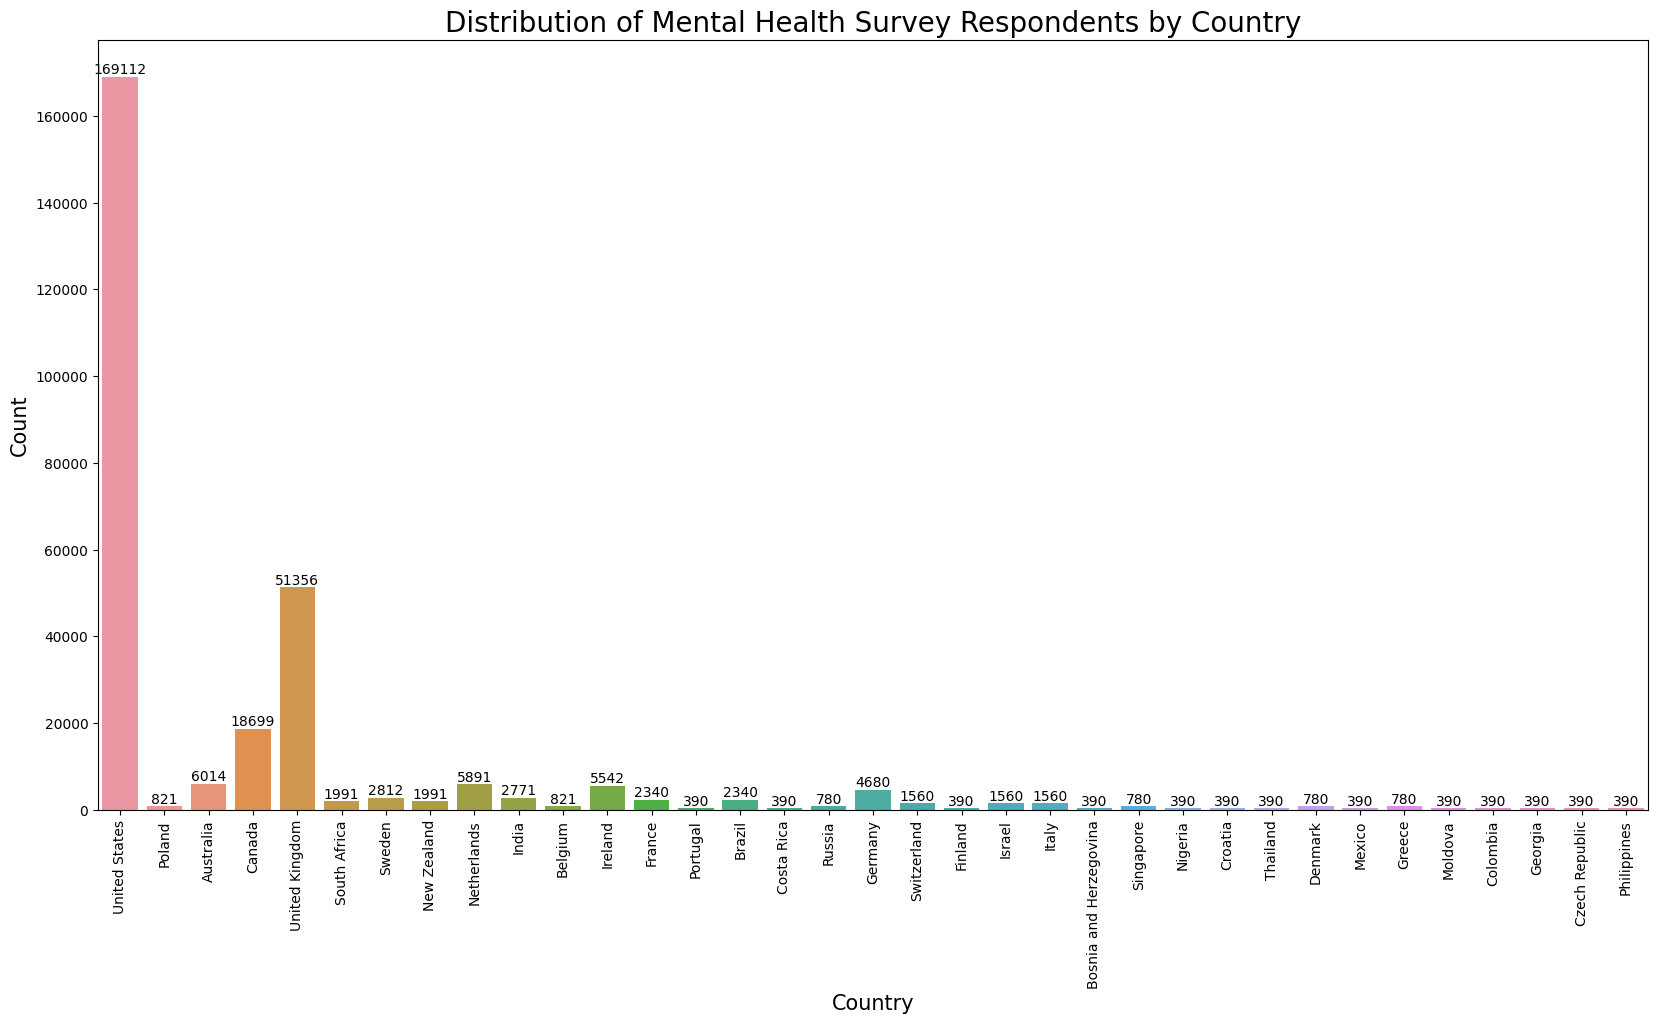

In [11]:
plt.figure(figsize=(20, 10))
ax = sns.countplot(x='Country', data=mental_health)
plt.xticks(rotation=90)
for container in ax.containers:
    ax.bar_label(container, label_type='edge')
ax.set_title('Distribution of Mental Health Survey Respondents by Country', fontsize=20)
ax.set_xlabel('Country', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.grid(False)
plt.show()

<div style="border: 2px solid #004080; background-color: #f0f8ff; padding: 15px; margin: 20px 0; border-radius: 8px;">
    <ul style="list-style-type: circle; margin: 0; padding-left: 20px;">
        <li style="font-size: 18px; font-family: Verdana, sans-serif;">
            <strong>Insight:</strong> Data shows a significant concentration of approximately 70% of the population details are in the <strong>United States</strong> and the <strong>United Kingdom</strong>. 
        </li>
    </ul>
</div>


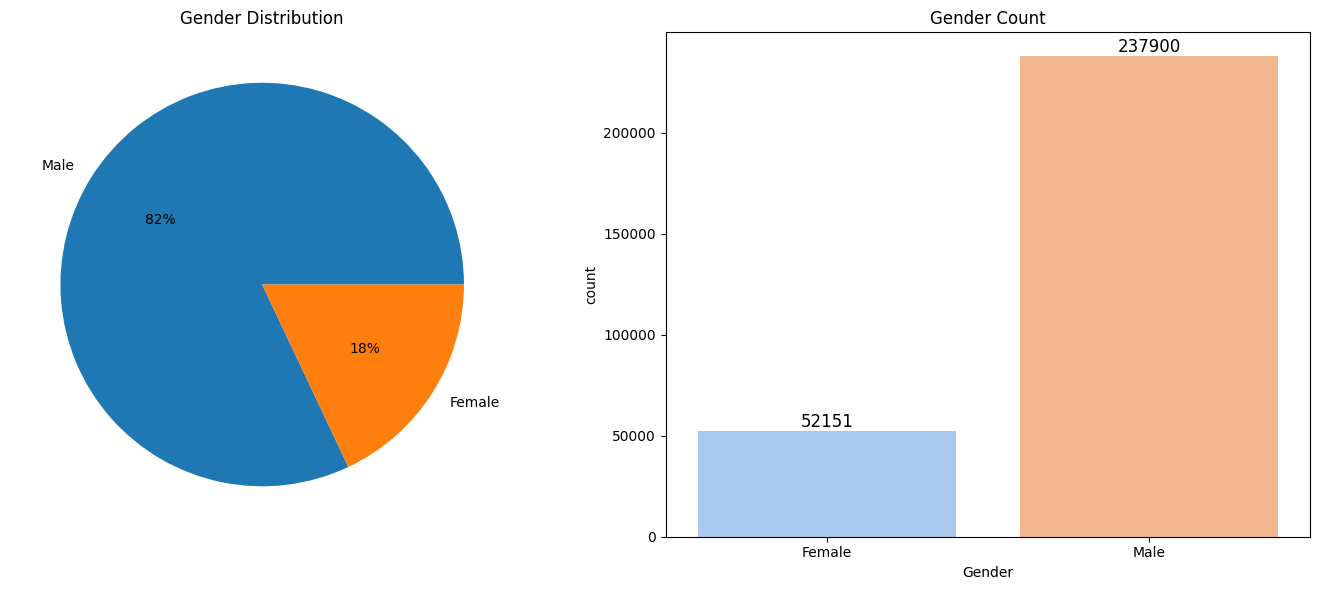

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].pie(
    mental_health['Gender'].value_counts(), 
    labels=['Male', 'Female'], 
    autopct='%.0f%%', 
    colors=['#1f77b4', '#ff7f0e']
)
axes[0].set_title('Gender Distribution')

b = sns.countplot(
    x='Gender', 
    data=mental_health, 
    ax=axes[1], 
    saturation=0.8, 
    palette='pastel'
)
for container in b.containers:
    b.bar_label(container, label_type='edge', fontsize=12)
b.set_title('Gender Count')
b.grid(False)

plt.tight_layout()
plt.show()



<div style="border: 2px solid #004080; background-color: #f0f8ff; padding: 15px; margin: 20px 0; border-radius: 8px;">
    <ul style="list-style-type: circle; margin: 0; padding-left: 20px;">
        <li style="font-size: 18px; font-family: Verdana, sans-serif;">
            <strong>Insight : Gender Distribution</strong> - The dataset shows that approximately 82% of the individuals are male. 
        </li>
    </ul>
</div>


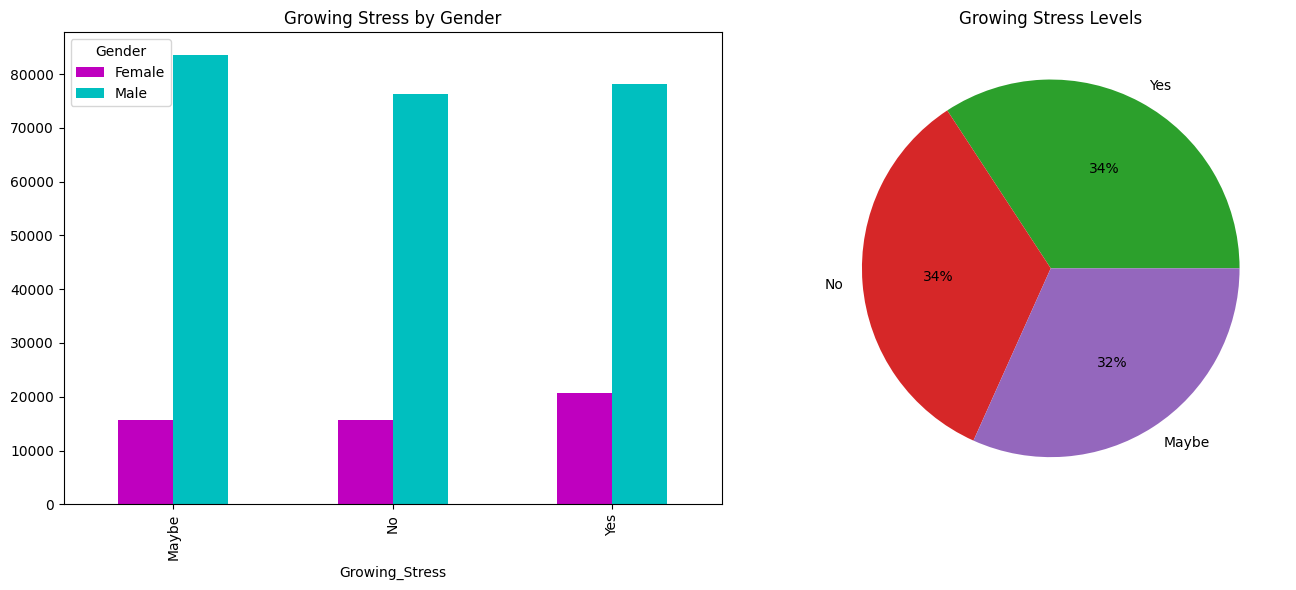

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

df = pd.crosstab(mental_health['Growing_Stress'], mental_health['Gender'])
df.plot(kind='bar', color=['m', 'c'], ax=axes[0])
axes[0].set_title('Growing Stress by Gender')
axes[0].grid(False)

axes[1].pie(
    mental_health['Growing_Stress'].value_counts(), 
    labels=['Yes', 'No', 'Maybe'], 
    autopct='%.0f%%', 
    colors=['#2ca02c', '#d62728', '#9467bd']
)
axes[1].set_title('Growing Stress Levels')

plt.tight_layout()
plt.show()


<div style="border: 2px solid #004080; background-color: #f0f8ff; padding: 15px; margin: 20px 0; border-radius: 8px;">
    <ul style="list-style-type: circle; margin: 0; padding-left: 20px;">
           <li style="font-size: 18px; font-family: Verdana, sans-serif;">
            <strong>Insight : Mental Health Status</strong> - About 34% of the respondents indicated that they are experiencing mental health issues, while 34% reported not having such issues. The remaining respondents are unsure about their mental health status.
        </li>
    </ul>
</div>


In [14]:
color_map = {'Yes': 'rgb(217, 145, 38)', 'No': 'rgb(163, 41, 102)', 'Maybe': 'rgb(115, 0, 153)'}
count = mental_health.groupby(['Growing_Stress', 'Days_Indoors']).size().reset_index(name='Count')
fig = px.bar(count,x ='Count',y = 'Days_Indoors',color = 'Growing_Stress',color_discrete_map=color_map, width=800, orientation='h')
fig.update_layout(title='Distribution of Growing Stress by Days_Indoors',title_font_size=20,title_font_family='Arial')
fig.show()

<div style="border: 2px solid #004080; background-color: #f0f8ff; padding: 15px; margin: 20px 0; border-radius: 8px;">
    <ul style="list-style-type: circle; margin: 0; padding-left: 20px;">
        <li style="font-size: 18px; font-family: Verdana, sans-serif;">
            <strong>Insight:</strong> The plot displays the count of growing stress occurrences categorized by days spent indoors. This visualization helps in understanding how different levels of indoor activity are associated with reported stress levels.
        </li>
    </ul>
</div>


In [15]:
color_map = {'Yes': 'rgb(217, 145, 38)', 'No': 'rgb(163, 41, 102)', 'Maybe': 'rgb(115, 0, 153)'}
count_data = mental_health.groupby(['Growing_Stress', 'Occupation']).size().reset_index(name='Count')
fig = px.bar(count_data,x ='Count',y = 'Occupation',color = 'Growing_Stress',color_discrete_map=color_map, width=800, orientation='h')
fig.update_layout(title='Distribution of Growing Stress by Occupations',title_font_size=20,title_font_family='Arial')
fig.show()


<div style="border: 2px solid #004080; background-color: #f0f8ff; padding: 15px; margin: 20px 0; border-radius: 8px;">
    <ul style="list-style-type: circle; margin: 0; padding-left: 20px;">
        <li style="font-size: 18px; font-family: Verdana, sans-serif;">
            <strong>Insight:</strong> The plot illustrates the distribution of growing stress across different occupations. This helps in understanding how stress levels vary with various job roles and can inform targeted support strategies.
        </li>
    </ul>
</div>


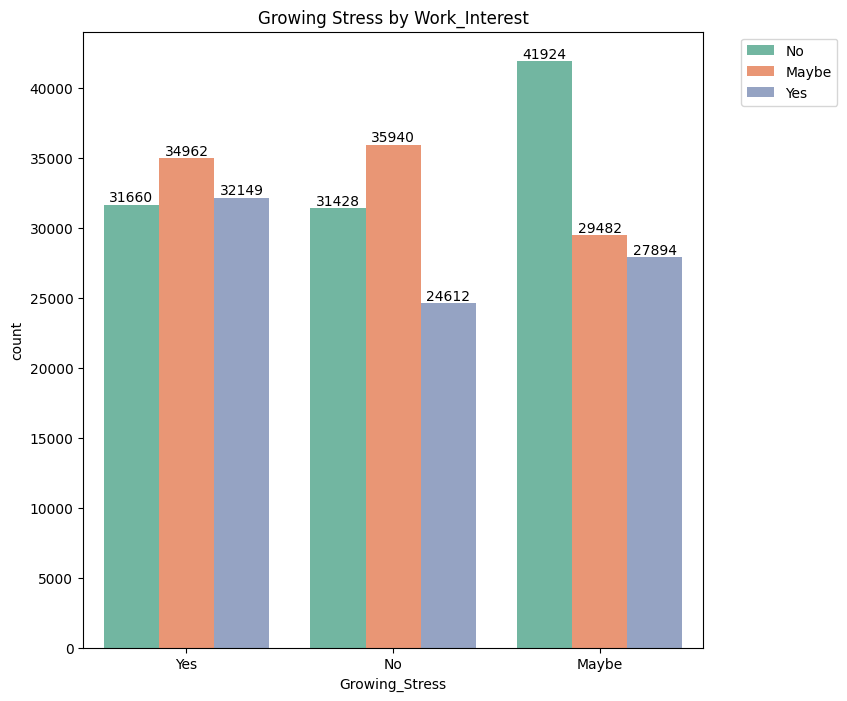

In [16]:
plt.figure(figsize=(8, 8))
ax1 = sns.countplot(x='Growing_Stress', hue='Work_Interest', data=mental_health,palette="Set2")
plt.title('Growing Stress by Work_Interest')
plt.grid(False)
for container in ax1.containers:
    ax1.bar_label(container, label_type='edge')


plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

<div style="border: 2px solid #004080; background-color: #f0f8ff; padding: 15px; margin: 20px 0; border-radius: 8px;">
    <ul style="list-style-type: circle; margin: 0; padding-left: 20px;">
        <li style="font-size: 18px; font-family: Verdana, sans-serif;">
            <strong>Insight:</strong> The above plot shows the count of growing stress in relation to work stress. 
        </li>
    </ul>
</div>


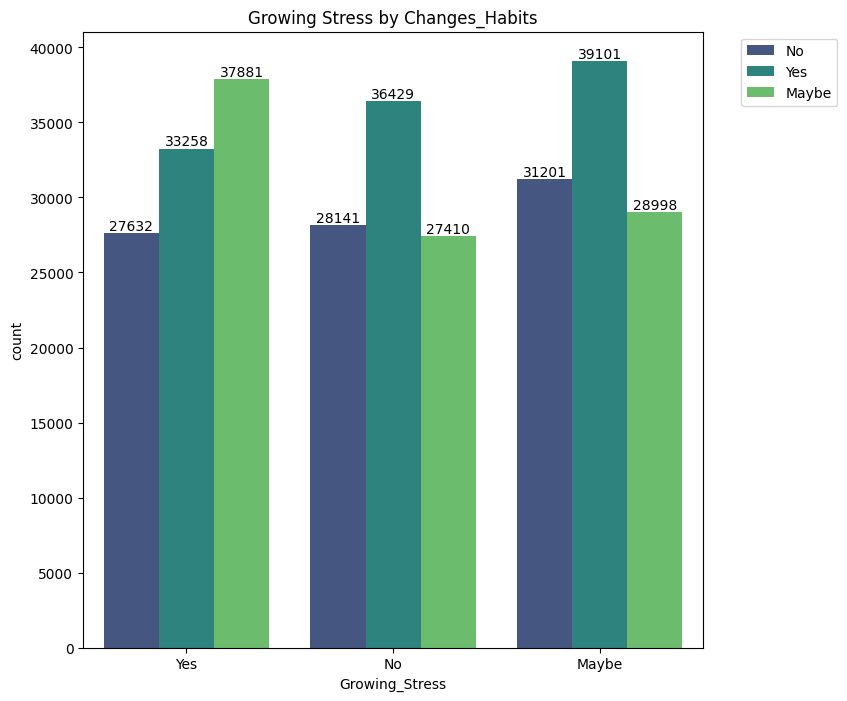

In [17]:
plt.figure(figsize=(8, 8))
ax2 = sns.countplot(x='Growing_Stress', hue='Changes_Habits', data=mental_health,palette="viridis")
plt.title('Growing Stress by Changes_Habits')
plt.grid(False)
for container in ax2.containers:
    ax2.bar_label(container, label_type='edge')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


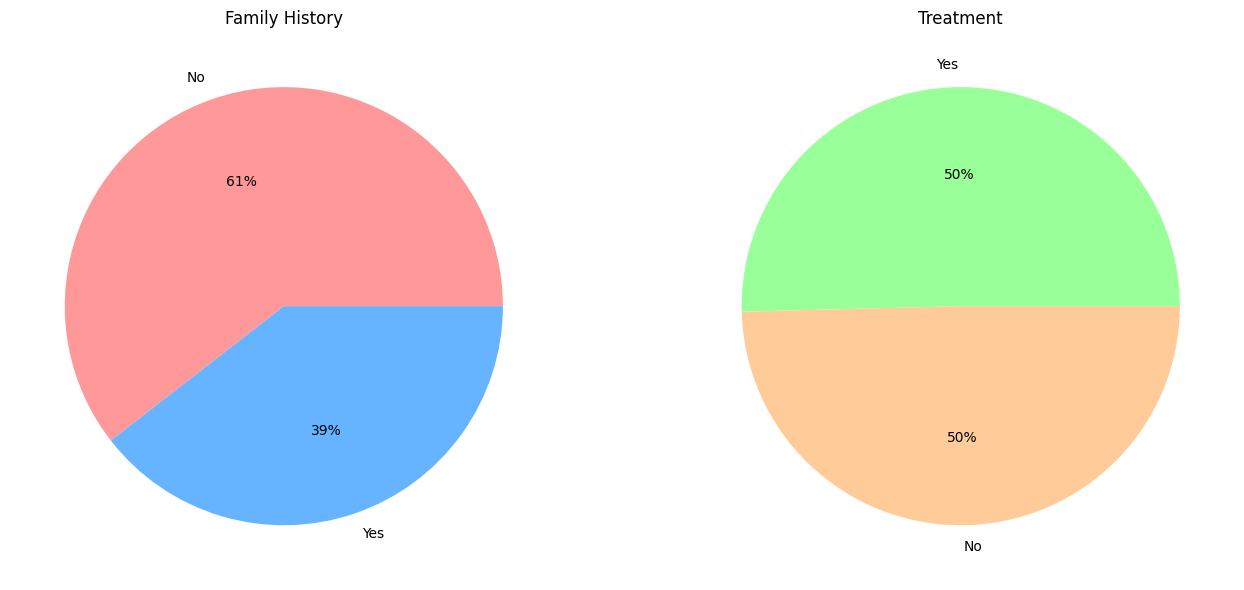

In [18]:

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].pie(
    mental_health['family_history'].value_counts(), 
    labels=mental_health['family_history'].unique(), 
    autopct='%.0f%%', 
    colors=['#ff9999', '#66b3ff']
)
axes[0].set_title('Family History')

axes[1].pie(
    mental_health['treatment'].value_counts(), 
    labels=mental_health['treatment'].unique(), 
    autopct='%.0f%%', 
    colors=['#99ff99', '#ffcc99']
)
axes[1].set_title('Treatment')

plt.tight_layout()
plt.show()


<div style="border: 2px solid #004080; background-color: #f0f8ff; padding: 15px; margin: 20px 0; border-radius: 8px;">
    <ul style="list-style-type: circle; margin: 0; padding-left: 20px;">
        <li style="font-size: 18px; font-family: Verdana, sans-serif;">
            <strong>Insight:</strong> The data shows that 39% have a family history of mental health issues, while 50% have sought treatment. This suggests that mental health concerns extend beyond genetic factors, and there is a significant willingness to seek help regardless of family history.
        </li>
    </ul>
</div>


# Convert categorical data to numerical values 

In [19]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

mental_health["Gender"] = le.fit_transform(mental_health["Gender"])
mental_health["self_employed"] = le.fit_transform(mental_health["self_employed"])
mental_health["family_history"] = le.fit_transform(mental_health["family_history"])
mental_health["treatment"] = le.fit_transform(mental_health["treatment"])
mental_health["Coping_Struggles"] = le.fit_transform(mental_health["Coping_Struggles"])


In [20]:
data = pd.get_dummies(data=mental_health, columns=[
    "Occupation", "Days_Indoors", "Growing_Stress", "Changes_Habits", 
    "Mental_Health_History", "Work_Interest", "Social_Weakness", 
    "mental_health_interview", "care_options"
])

data = pd.get_dummies(data=data, columns=["Mood_Swings"])


In [21]:
data.drop("Timestamp", axis=1, inplace=True)

In [22]:
import pandas as pd
from category_encoders import LeaveOneOutEncoder
  
leave_encoder = LeaveOneOutEncoder()
data["Country"] = leave_encoder.fit_transform(data["Country"], data.iloc[:, -3])


In [23]:
data.head() 

,Gender,Country,self_employed,family_history,treatment,Coping_Struggles,Occupation_Business,Occupation_Corporate,Occupation_Housewife,Occupation_Others,...,Social_Weakness_Yes,mental_health_interview_Maybe,mental_health_interview_No,mental_health_interview_Yes,care_options_No,care_options_Not sure,care_options_Yes,Mood_Swings_High,Mood_Swings_Low,Mood_Swings_Medium
0,0,0.31273,0,0,1,0,False,True,False,False,...,True,False,True,False,False,True,False,False,False,True
1,0,0.31273,0,1,1,0,False,True,False,False,...,True,False,True,False,True,False,False,False,False,True
2,0,0.31273,0,1,1,0,False,True,False,False,...,True,False,True,False,False,False,True,False,False,True
3,0,0.31273,0,1,1,0,False,True,False,False,...,True,True,False,False,False,False,True,False,False,True
4,0,0.31273,0,1,1,0,False,True,False,False,...,True,False,True,False,False,False,True,False,False,True


# Training

In [24]:
y = data.iloc[:, -3:]
X = data.drop(data.iloc[:, -3:], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42)

In [25]:
import pandas as pd
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, HistGradientBoostingClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import roc_auc_score, accuracy_score

model_list = [LinearSVC(), LogisticRegression(), GradientBoostingClassifier(),
              AdaBoostClassifier(), HistGradientBoostingClassifier()]

roc_auc_list = []
accuracy_list = []

for model in model_list: 
    multi_class = MultiOutputClassifier(model, n_jobs=-1)
    for i in data.iloc[:, -3:]:
        multi_class.fit(X_train, y_train[[i]])
        y_pred = multi_class.predict(X_test)
        roc_auc = roc_auc_score(y_test[i], y_pred)
        accuracy = accuracy_score(y_test[[i]], y_pred)
        
        roc_auc_list.append(roc_auc)
        accuracy_list.append(accuracy)


In [26]:
accuracy_df = pd.DataFrame(accuracy_list, columns=["value"])
roc_auc_df = pd.DataFrame(roc_auc_list, columns=["value"])
list_models = ["LinearSVC", "LogisticRegression", "GradientBoostingClassifier",
               "AdaBoostClassifier", "HistGradientBoostingClassifier"]

Accuracy scores of categories with LinearSVC: 0.677469277680733
Roc_auc_scores of categories with LinearSVC: 0.5328538035624198


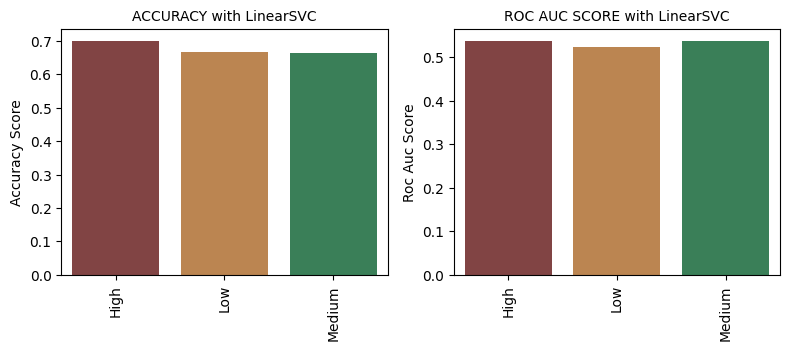

Accuracy scores of categories with LogisticRegression: 0.6780936839201986
Roc_auc_scores of categories with LogisticRegression: 0.537324419761223


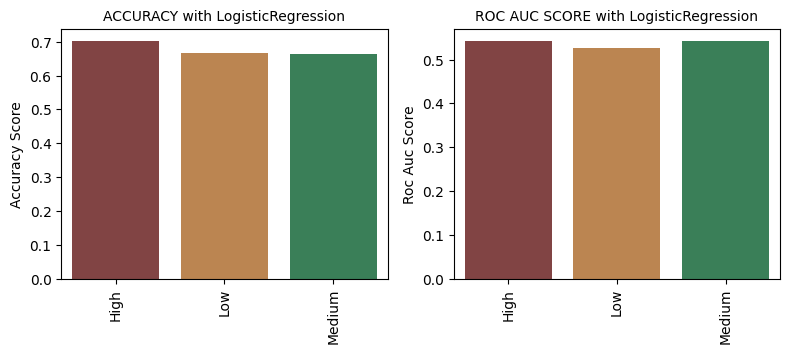

Accuracy scores of categories with GradientBoostingClassifier: 0.884392908583862
Roc_auc_scores of categories with GradientBoostingClassifier: 0.8597233780582707


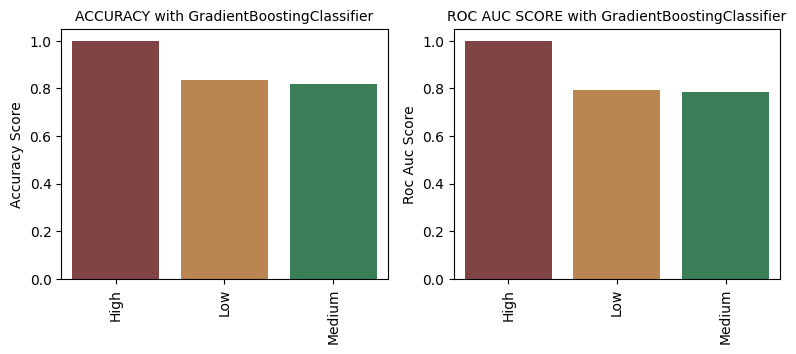

Accuracy scores of categories with AdaBoostClassifier: 0.8066983849713463
Roc_auc_scores of categories with AdaBoostClassifier: 0.762643053659937


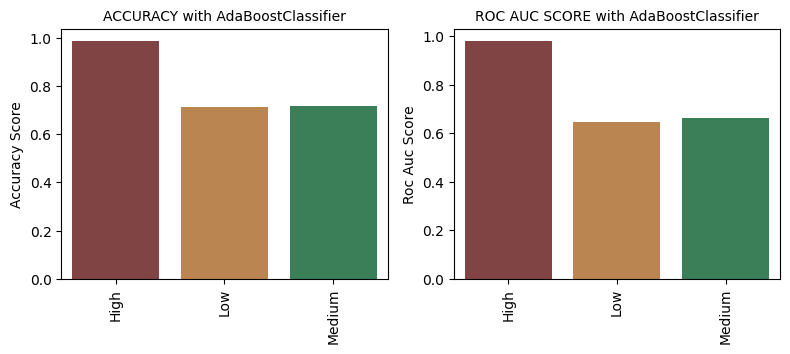

Accuracy scores of categories with HistGradientBoostingClassifier: 0.988814317673378
Roc_auc_scores of categories with HistGradientBoostingClassifier: 0.9877705952316836


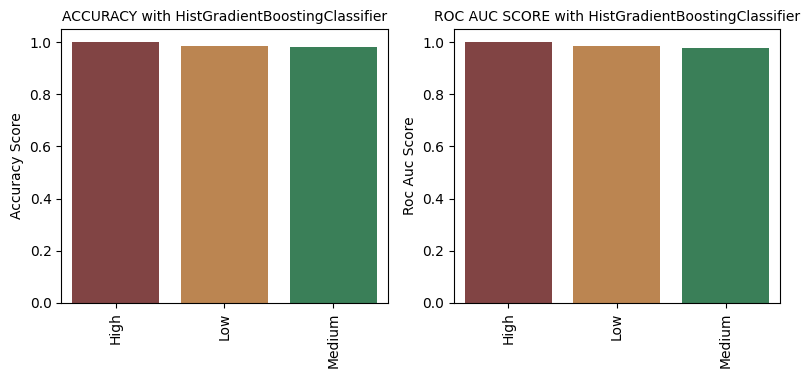

In [27]:
k = 1
l = 2
i = 0
j = 3
clrs = ["#8b3a3a", "#cd853f", "#2e8b57", "#8b7b8b"]
for model_name in list_models:
    plt.figure(figsize=(8,16))
    plt.subplot(5,2, k)
    sns.barplot(x=['High', 'Low', 'Medium'], y=accuracy_df["value"][i:j], palette=clrs)
    plt.ylabel("Accuracy Score")
    plt.xlabel("")
    plt.xticks(rotation=90)
    plt.title(f"ACCURACY with {model_name}", fontsize=10)
    print(f"Accuracy scores of categories with {model_name}: {accuracy_df.value[i:j].mean()}")
    k += 2
    plt.subplot(5,2, l)
    sns.barplot(x=['High', 'Low', 'Medium'], y=roc_auc_df["value"][i:j], palette=clrs)
    plt.ylabel("Roc Auc Score")
    plt.xlabel("")
    plt.xticks(rotation=90)
    plt.title(f"ROC AUC SCORE with {model_name}", fontsize=10)
    print(f"Roc_auc_scores of categories with {model_name}: {roc_auc_df.value[i:j].mean()}")
    l += 2
    i += 3
    j += 3
    plt.tight_layout()
    plt.show()

# Accuracy and roc_auc score averages of all models

In [28]:
accuracy_averages = [accuracy_df.value[:3].mean(), accuracy_df.value[3:6].mean(), accuracy_df.value[6:9].mean(),
                    accuracy_df.value[9:12].mean(), accuracy_df.value[12:15].mean()]

roc_auc_averages = [roc_auc_df.value[:3].mean(), roc_auc_df.value[3:6].mean(), roc_auc_df.value[6:9].mean(),
                    roc_auc_df.value[9:12].mean(), roc_auc_df.value[12:15].mean()]

avarage_df = pd.DataFrame(accuracy_averages, columns=["accuracy_mean"], index=list_models)
avarage_df["roc_auc_mean"] = roc_auc_averages

In [29]:
avarage_df.head()

,accuracy_mean,roc_auc_mean
LinearSVC,0.677469,0.532854
LogisticRegression,0.678094,0.537324
GradientBoostingClassifier,0.884393,0.859723
AdaBoostClassifier,0.806698,0.762643
HistGradientBoostingClassifier,0.988814,0.987771


# Selected model

In [30]:
roc_auc_list = []
accuracy_list = []

hist_class = MultiOutputClassifier(HistGradientBoostingClassifier(), n_jobs=-1)
print("HistGradientBoostingClassifier SELECTED MODEL\n")

for i in data.iloc[:,-3:].columns:
    hist_class.fit(X_train, y_train[[i]])
    y_pred = hist_class.predict(X_test)
    roc_auc = roc_auc_score(y_test[[i]], y_pred)
    accuracy = accuracy_score(y_test[[i]], y_pred)
    
    roc_auc_list.append(roc_auc)
    accuracy_list.append(accuracy)
            
    print(f'Category name: {i}')
    print(f'{i} AUC ROC score is: {roc_auc:.3f}')
    print(f"accuracy score is: {accuracy:.3f}")
    print("\n", "-" * 50)

HistGradientBoostingClassifier SELECTED MODEL

Category name: Mood_Swings_High
Mood_Swings_High AUC ROC score is: 1.000
accuracy score is: 1.000

 --------------------------------------------------
Category name: Mood_Swings_Low
Mood_Swings_Low AUC ROC score is: 0.992
accuracy score is: 0.991

 --------------------------------------------------
Category name: Mood_Swings_Medium
Mood_Swings_Medium AUC ROC score is: 0.986
accuracy score is: 0.988

 --------------------------------------------------


# Classification Report

In [31]:
hist_high = MultiOutputClassifier(HistGradientBoostingClassifier(), n_jobs=-1).fit(X_train, y_train[["Mood_Swings_High"]])
hist_low = MultiOutputClassifier(HistGradientBoostingClassifier(), n_jobs=-1).fit(X_train, y_train[["Mood_Swings_Low"]])
hist_medium = MultiOutputClassifier(HistGradientBoostingClassifier(), n_jobs=-1).fit(X_train, y_train[["Mood_Swings_Medium"]])

pred_high = hist_high.predict(X_test)
pred_low = hist_low.predict(X_test)
pred_medium = hist_medium.predict(X_test)

In [32]:
print(classification_report(y_test["Mood_Swings_High"], pred_high))


              precision    recall  f1-score   support

       False       1.00      1.00      1.00     59848
        True       1.00      1.00      1.00     27168

    accuracy                           1.00     87016
   macro avg       1.00      1.00      1.00     87016
weighted avg       1.00      1.00      1.00     87016



In [33]:
print(classification_report(y_test["Mood_Swings_Low"], pred_low))

              precision    recall  f1-score   support

       False       0.99      0.99      0.99     57231
        True       0.98      0.99      0.98     29785

    accuracy                           0.99     87016
   macro avg       0.99      0.99      0.99     87016
weighted avg       0.99      0.99      0.99     87016



In [34]:
print(classification_report(y_test["Mood_Swings_Medium"], pred_medium))

              precision    recall  f1-score   support

       False       0.99      0.99      0.99     56953
        True       0.99      0.98      0.98     30063

    accuracy                           0.99     87016
   macro avg       0.99      0.99      0.99     87016
weighted avg       0.99      0.99      0.99     87016



# Confusion Matrices

In [35]:

cm_high = confusion_matrix(y_test["Mood_Swings_High"], pred_high)
cm_low = confusion_matrix(y_test["Mood_Swings_Low"], pred_low)
cm_medium = confusion_matrix(y_test["Mood_Swings_Medium"], pred_medium)

# ROC AUC Curve

In [36]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc
y_prob_high = hist_high.predict_proba(X_test)[0][:, 1]
y_prob_low = hist_low.predict_proba(X_test)[0][:, 1]
y_prob_medium = hist_medium.predict_proba(X_test)[0][:, 1]

fpr_h, tpr_h, thresholds_h = roc_curve(y_test["Mood_Swings_High"], y_prob_high)
fpr_l, tpr_l, thresholds_l = roc_curve(y_test["Mood_Swings_Low"], y_prob_low)
fpr_m, tpr_m, thresholds_m = roc_curve(y_test["Mood_Swings_Medium"], y_prob_medium)

roc_auc_h = auc(fpr_h, tpr_h)
roc_auc_l = auc(fpr_l, tpr_l)
roc_auc_m = auc(fpr_m, tpr_m)


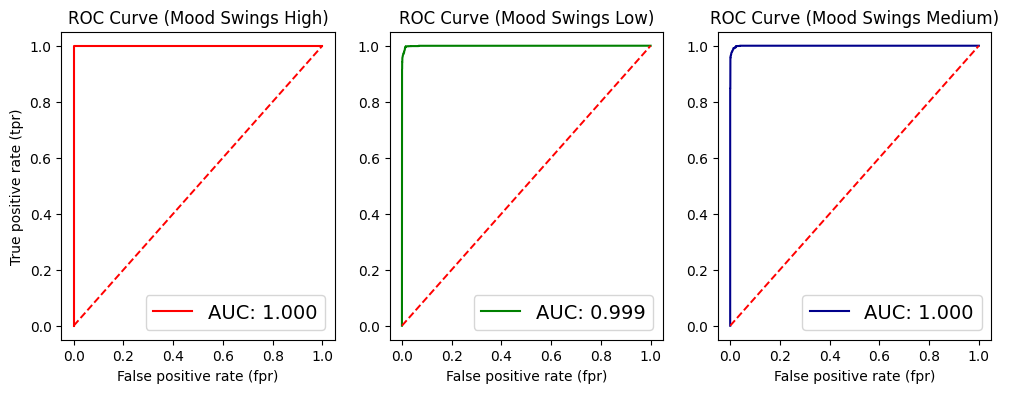

In [37]:
plt.figure(figsize=(12,4))
plt.subplot(1,3,1)
plt.plot(fpr_h, tpr_h, color="red", label= f"AUC: {roc_auc_h:.3f}")
plt.plot([0, 1], [0, 1], color="r", linestyle="--", linewidth=1.4)
plt.legend(fontsize=14)
plt.xlabel("False positive rate (fpr)")
plt.ylabel("True positive rate (tpr)")
plt.title("ROC Curve (Mood Swings High)")
plt.subplot(1,3,2)
plt.plot(fpr_l, tpr_l, color="Green", label= f"AUC: {roc_auc_l:.3f}")
plt.plot([0, 1], [0, 1], color="r", linestyle="--", linewidth=1.4)
plt.legend(fontsize=14)
plt.xlabel("False positive rate (fpr)")
plt.title("ROC Curve (Mood Swings Low)")
plt.subplot(1,3,3)
plt.plot(fpr_m, tpr_m, color="darkblue", label= f"AUC: {roc_auc_m:.3f}")
plt.plot([0, 1], [0, 1], color="r", linestyle="--", linewidth=1.4)
plt.legend(fontsize=14)
plt.xlabel("False positive rate (fpr)")
plt.title("ROC Curve (Mood Swings Medium)")
plt.show()